In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Baca CSV

In [2]:
df = pd.read_csv("white_wine.csv")

Drop Null Data

In [3]:
df.dropna(inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


Preprocess by labeling quality>6 as 1 and quality<=6 as 0

In [4]:
df['quality'] = np.where(df['quality']>6.0,1,0)

In [5]:
data_classification = df[['density','alcohol', 'quality']]
data_classification.head()

,density,alcohol,quality
0,1.0010,8.8,0
1,0.9940,9.5,0
2,0.9951,10.1,0
3,0.9956,9.9,0
4,0.9956,9.9,0


Create multiple estimators

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Train test split data

In [7]:
X = data_classification[['density','alcohol']].copy()
y = data_classification['quality'].copy()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020, stratify=y)

In [9]:
LogRegModel = LogisticRegression().fit(X = X_train, y=y_train)
DTModel = DecisionTreeClassifier().fit(X = X_train, y=y_train)
KNNModel = KNeighborsClassifier().fit(X = X_train, y=y_train)
RFCModel = RandomForestClassifier().fit(X = X_train, y=y_train)
NNModel = MLPClassifier().fit(X = X_train, y=y_train)

C:\Users\Richard\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Make into voting classifier

In [10]:
estimators = [LogRegModel, DTModel, KNNModel, RFCModel, NNModel]

In [11]:
for model in estimators:
    y_pred = model.predict(X_test)
    print(classification_report(y_true = y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        84
           1       0.73      0.40      0.52        20

    accuracy                           0.86       104
   macro avg       0.80      0.68      0.72       104
weighted avg       0.84      0.86      0.84       104

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.95      0.95      0.95        20

    accuracy                           0.98       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.98      0.98      0.98       104

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        84
           1       0.68      0.75      0.71        20

    accuracy                           0.88       104
   macro avg       0.81      0.83      0.82       104
weighted avg       0.89      0.88      0.89       104

              preci

C:\Users\Richard\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Richard\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Richard\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [12]:
from sklearn.ensemble import VotingClassifier

VCModel_1 = VotingClassifier(
    estimators=[('LogReg', LogRegModel), ('DecisionTree', DTModel), ('KNN', KNNModel), ('RandomForest', RFCModel), ('NeuralNetwork', NNModel)],
    voting  = "hard",
    verbose = True
)

VCModel_2 = VotingClassifier(
    estimators=[('LogReg', LogRegModel), ('DecisionTree', DTModel), ('KNN', KNNModel), ('RandomForest', RFCModel), ('NeuralNetwork', NNModel)],
    voting = "soft",
    verbose=True
)

# VCModel = VotingClassifier(
#     estimators=[('DecisionTree', DTModel),('RandomForest', RFCModel)]
# )


In [13]:
VCModel_1.fit(X=X_train,y=y_train)

[Voting] ................... (1 of 5) Processing LogReg, total=   0.0s
[Voting] ............. (2 of 5) Processing DecisionTree, total=   0.0s
[Voting] ...................... (3 of 5) Processing KNN, total=   0.0s


[Voting] ............. (4 of 5) Processing RandomForest, total=   0.2s
[Voting] ............ (5 of 5) Processing NeuralNetwork, total=   0.4s


C:\Users\Richard\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('LogReg', LogisticRegression()),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier()),
                             ('RandomForest', RandomForestClassifier()),
                             ('NeuralNetwork', MLPClassifier())],
                 verbose=True)

In [14]:
VCModel_2.fit(X=X_train,y=y_train)

[Voting] ................... (1 of 5) Processing LogReg, total=   0.0s
[Voting] ............. (2 of 5) Processing DecisionTree, total=   0.0s
[Voting] ...................... (3 of 5) Processing KNN, total=   0.0s
[Voting] ............. (4 of 5) Processing RandomForest, total=   0.2s
[Voting] ............ (5 of 5) Processing NeuralNetwork, total=   0.4s


C:\Users\Richard\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('LogReg', LogisticRegression()),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier()),
                             ('RandomForest', RandomForestClassifier()),
                             ('NeuralNetwork', MLPClassifier())],
                 verbose=True, voting='soft')

Hard Voting Model Report

In [15]:
y_pred = VCModel_1.predict(X_test)
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        84
           1       1.00      0.75      0.86        20

    accuracy                           0.95       104
   macro avg       0.97      0.88      0.91       104
weighted avg       0.95      0.95      0.95       104



Soft Voting Model Report

In [16]:
y_pred = VCModel_2.predict(X_test)
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        84
           1       1.00      0.85      0.92        20

    accuracy                           0.97       104
   macro avg       0.98      0.93      0.95       104
weighted avg       0.97      0.97      0.97       104



Stacking Model


In [17]:
from sklearn.ensemble import StackingClassifier

In [27]:
SCModel = StackingClassifier(
    estimators=[('DecisionTree', DTModel), ('KNN', KNNModel), ('RandomForest', RFCModel), ('NeuralNetwork', NNModel)],
    final_estimator=MLPClassifier(),
    stack_method="predict_proba",
    verbose = True
)

SCModel.fit(X = X_train, y = y_train)

C:\Users\Richard\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Richard\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


StackingClassifier(estimators=[('DecisionTree', DecisionTreeClassifier()),
                               ('KNN', KNeighborsClassifier()),
                               ('RandomForest', RandomForestClassifier()),
                               ('NeuralNetwork', MLPClassifier())],
                   final_estimator=MLPClassifier(),
                   stack_method='predict_proba', verbose=True)

In [28]:
y_pred = SCModel.predict(X_test)
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        84
           1       0.95      0.90      0.92        20

    accuracy                           0.97       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.97      0.97      0.97       104



BaggingClassifier

In [29]:
from sklearn.ensemble import BaggingClassifier

In [43]:
BCModel = BaggingClassifier(
    n_estimators = 5,
    max_samples=0.8
)

BCModel.fit(X = X_train, y = y_train)

BaggingClassifier(max_samples=0.8, n_estimators=5)

In [44]:
y_pred = BCModel.predict(X_test)
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.95      0.95      0.95        20

    accuracy                           0.98       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.98      0.98      0.98       104



RandomForest Classifier

In [47]:
y_RFC = df['quality'].copy()
X_RFC = df.drop('quality', axis=1)

In [48]:
X_train_RFC, X_test_RFC, y_train_RFC, y_test_RFC = train_test_split(X_RFC, y_RFC, test_size=0.2, random_state=2020)

In [56]:
RFCModel_Full = RandomForestClassifier(
    max_leaf_nodes=5,
    max_depth=4,
    max_features=4
).fit(X_train_RFC, y_train_RFC)

In [57]:
y_pred_RFC = RFCModel_Full.predict(X_test_RFC)
print(classification_report(y_true = y_test_RFC, y_pred = y_pred_RFC))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        86
           1       1.00      0.39      0.56        18

    accuracy                           0.89       104
   macro avg       0.94      0.69      0.75       104
weighted avg       0.91      0.89      0.87       104



<Axes: >

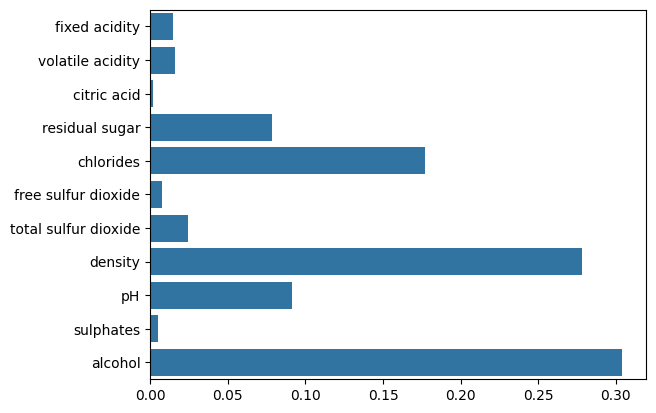

In [60]:
sns.barplot(
    x = RFCModel_Full.feature_importances_,
    y = RFCModel_Full.feature_names_in_
)

Boosting Model

In [61]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 6.3 MB/s eta 0:00:20
    --------------------------------------- 2.6/124.9 MB 7.2 MB/s eta 0:00:18
   - -------------------------------------- 4.7/124.9 MB 8.4 MB/s eta 0:00:15
   -- ------------------------------------- 6.6/124.9 MB 8.6 MB/s eta 0:00:14
   -- ------------------------------------- 8.7/124.9 MB 8.8 MB/s eta 0:00:14
   --- ------------------------------------ 10.5/124.9 MB 8.8 MB/s eta 0:00:13
   --- ------------------------------------ 12.1/124.9 MB 8.5 MB/s eta 0:00:14
   ---- ----------------------------------- 13.9/124.9 MB 8.7 MB/s eta 0:00:13
   ----- ---------------------------------- 16.0/124.9 MB 8.7 MB/s eta 0:00:13
   ----- ---------------------------------- 17.8/124.9 MB 8.7 MB/s eta 0:00:13
   ------ --------------------------------- 19.9/124.9 MB 8.8 MB/s

In [62]:
import xgboost as xgb

In [63]:
XGBModel = xgb.XGBRFClassifier()

XGBModel.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [64]:
y_pred = XGBModel.predict(X_test)
print(classification_report(
    y_true = y_test,
    y_pred = y_pred
))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        84
           1       0.90      0.95      0.93        20

    accuracy                           0.97       104
   macro avg       0.95      0.96      0.95       104
weighted avg       0.97      0.97      0.97       104

